# Introduction
Nous basons notre étude sur le rapport de publié par le [World Happiness Report](https://worldhappiness.report) sur le bonheur.  
Les scores obtenus sont obtenus par les enquêtes de **Gallup**, et nous disposons directement de la moyenne pour chaque pays pour chaque année.

- `Life_Ladder`: La **variable à expliquer**. Un score obtenu en demandant aux répondants d'évaluer leur vie sur une échelle de 0 à 10, où 0 est la pire vie possible et 10 l'extrême opposé.
- `Foreign_born`: La note moyenne donnée par les personnes qui ne sont pas originaires du pays.
- `Locally_born`: La note moyenne donnée par les personnes de souche.
- `Whisker.high` et `low`: Les notes maximale et minimale.



Nous utilisons les données à jour des 4 dernières années pour construire nos données pour l'analyse, ils s'agiront de nos **variables exogènes**. Nos données brutes proviennent de:

- **Banque Mondiale**:
    - `GDP_PPP`: Moyenne du PIB par habitant à parité de pouvoir d'achat (PPA) corrigée en dollars internationaux constants de 2011, entre 2015 et 2018 *(2013 - 2016 dans le rapport du WHR)*.
    - `GINI 02-18`: Moyenne de l'indice de GINI de 2002 à 2018 *(2000 - 2016 dans le rapport du WHR)*.
- **Organisation Mondiale de la Santé**:  
    - `HALE_birth`: Espérance de vie en bonne santé à la naissance pour chaque pays, données de l'OMS de 2012. Les données manquantes ont été complétées par les données de la banque mondiale pour la même année.  
- **Gallup World Poll**:  
    - `Social_support`: Moyenne nationale des réponses binaires (0 ou 1) à la question "Si vous aviez des problèmes, avez-vous des parents ou des amis sur lesquels vous pouvez compter pour vous aider quand vous en avez besoin ou non ?"  
    - `Freedom`: Moyenne nationale des réponses binaires à la question "Êtes-vous satisfait ou insatisfait de votre liberté de choisir ce que vous faites de votre vie ?  
    - `Generosity`: Résidu de la régression de la moyenne nationale des réponses à la question " Avez-vous donné de l'argent à un organisme de bienfaisance au cours du dernier mois ?" sur le PIB par habitant.  
    - `Corruption`: Moyenne des réponses binaires à deux questions:  
        - "La corruption est-elle répandue dans tout le gouvernement ou non ?"  
        - "La corruption est-elle répandue dans les entreprises ou non ?"  
    - `Positive_affect` ( resp. `Negative_affect`): Moyenne des mesures de l'effet des jours précédents l'enquête pour le bonheur, le rire et le plaisir (resp. l'inquiétude, la tristesse et la colère).  
    - `Confidence_government`: Moyenne nationale des réponses binaires à la question "Faîtes-vous confiance en votre gouvernement ?"  
    - `GINI_household_income_Gallup`: Mesure de l'indice de GINI pour les ménages du pays en 2017  
    - `Trust_People_Gallup`: Moyenne nationale des réponses binaires à la question "Faîtes-vous confiance à un inconnu ?"  
- **European Social Survey**:  
    - `Democratic_Quality`: Moyenne nationale de la mesure de la qualité de la démocratie sur une échelle de 0 à 10, ramenée à une échelle de -5 à +5  
    - `Delivery_Quality`: Moyenne nationale de la mesure de la prestation du gouvernement sur une échelle de 0 à 10, ramenée à une échelle de -5 à +5  
- **World Value Survey**:  
    - `Trust_people_WVS` pour `05_09` et `10_14`: Moyenne nationale des réponses binaires en 2005-2009, puis en 2010-2014, à la question "Faîtes-vous confiance à un inconnu ?"  
- **World Happiness Report**:  
    - `Region`: Régions utilisées par WHR pour leur analyse

---
Libraries utilisées
```
PerformanceAnalytics
ggplot2
gridExtra
reshape
AER
```

In [1]:
if (!require("pacman")) install.packages("pacman")
pacman::p_load(PerformanceAnalytics, ggplot2, gridExtra, reshape, AER)

Loading required package: pacman


In [2]:
brut <- read.csv("brut.csv",
                 sep = ";",
                 header = T,
                 encoding = "UTF-8",
                 dec = ","
                )

region <- read.csv("region.csv",
                   sep = ";",
                   header = T,
                   encoding = "UTF-8"
                  )

citizenship <- read.csv("locally_foreign.csv",
                        sep = ";",
                        header = T,
                        encoding = "UTF-8",
                        dec = ","
                       )

# Statistique descriptive
Dans notre table d'analyse, nous avons pour chaque individu (Pays), ses statistiques obtenues grâce au prétraitement expliqué précédemment.  
Dans cette section, nous analyserons la distribution des variables au sein des individus, la corrélation entre elles.

In [3]:
data <- merge(region,
              merge(citizenship,
                    aggregate(brut[, 3:19], list(brut$Country), mean, na.rm = T),
                    by.x = "Country", by.y = "Group.1"),
              by = "Country")

head(data)

Country,Region,Foreign_born,Whisker.high,Whisker.low,Locally_born,Life_Ladder,GDP_PPP,Social_support,HALE_birth,...,Positive_affect,Negative_affect,Confidence_government,Democratic_Quality,Delivery_Quality,GINI_02_18_WB,GINI_household,Trust_People_Gallup,Trust_people_WVS_05_09,Trust_people_WVS_10_14
Afghanistan,South Asia,4.068,4.268,3.869,3.853,3.705495,1713.203,0.5162701,52.25455,...,0.5666233,0.3107030,0.3971897,-1.8966928,-1.4765236,NaN,0.3761697,0.2810740,NaN,NaN
Argentina,Latin America and Caribbean,5.843,6.077,5.609,6.440,6.358951,18522.625,0.9056055,67.71538,...,0.8394063,0.2768269,0.3898764,0.2067990,-0.4661795,0.4609375,0.3550522,0.1991232,0.1740575,0.1935307
Armenia,Commonwealth of Independent States,4.101,4.262,3.940,4.418,4.438665,7573.231,0.7137752,65.63077,...,0.5464819,0.4344486,0.3304487,-0.4045399,-0.2156013,0.3192500,0.4109090,0.1566443,NaN,0.1091358
Australia,North America and ANZ,7.249,7.332,7.167,7.324,7.298081,42673.445,0.9485205,72.46667,...,0.8058491,0.2152142,0.5032259,1.1817487,1.7895835,0.3427500,0.4309005,NaN,0.4613790,0.5181401
Austria,Western Europe,6.903,7.076,6.729,7.261,7.249100,44396.501,0.9268618,71.85818,...,0.7911639,0.1732441,0.4237300,1.2874848,1.6374614,0.3026923,0.3306453,0.3006652,NaN,NaN
Azerbaijan,Commonwealth of Independent States,4.735,4.974,4.495,4.923,4.923112,15317.273,0.7617180,63.80000,...,0.5673765,0.2358657,0.7559600,-0.9853211,-0.6862568,0.2110000,0.3062165,0.2740562,NaN,0.1479329


## Distribution du score
Visualisons les **distributions mondiale et régionales** de l'évaluation `Life_Ladder` moyenne des 4 dernières années.  
En effet, le score peut aussi dépendre de la région du monde où les répondants vivent. On remarque que les scores sont tous supérieurs à 5 en Amérique latine, en Europe Occidentale.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing missing values (geom_bar)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing missing values (geom_bar)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing missing values (geom_bar)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing missing values (geom_bar)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing missing values (geom_bar)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing missing values (geom_bar)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing missing values (geom_bar)."`stat_bin()` using `bins = 30`. Pi

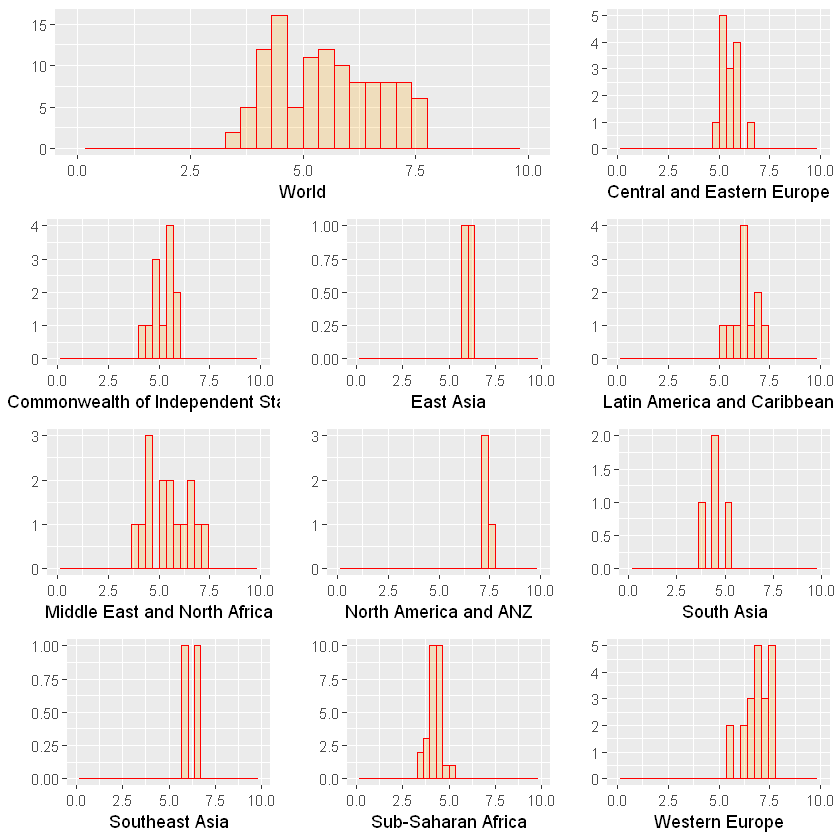

In [4]:
world <- ggplot(data) + aes(x = Life_Ladder) + geom_histogram(color = "red", fill = "orange", 
    alpha = 0.2) + scale_x_continuous(name = "World", limits = c(0, 10)) + ylab("")

region <- vector("list", length = 10)
for (i in 1:length(levels(data$Region))) {
    region[[i]] <- ggplot(data[data$Region == levels(data$Region)[i], ]) +
                    aes(x = Life_Ladder) + 
                    geom_histogram(color = "red", fill = "orange", alpha = 0.2) +
                    scale_x_continuous(name = levels(data$Region)[i],
                                       limits = c(0, 10)) + ylab("")
}

grid.arrange(world, region[[1]],
             region[[2]], region[[3]], region[[4]],
             region[[5]], region[[6]], region[[7]],
             region[[8]], region[[9]], region[[10]],
             ncol = 3, nrow = 4,
             layout_matrix = matrix(c(rep(1,2),2:11), ncol = 3, byrow = T)
             )

Visualisons la **distribution en fonction de l'origine** de `Life_Ladder`.  
La répartition des scores est confondues entre les personnes de souche `Locally_born` et celles non originaires du pays `Foreign_born`. Dans la suite, nous considérerons uniquement `Life_Ladder` donc.

Using  as id variables
Warning message:
"Removed 4 rows containing missing values (geom_bar)."

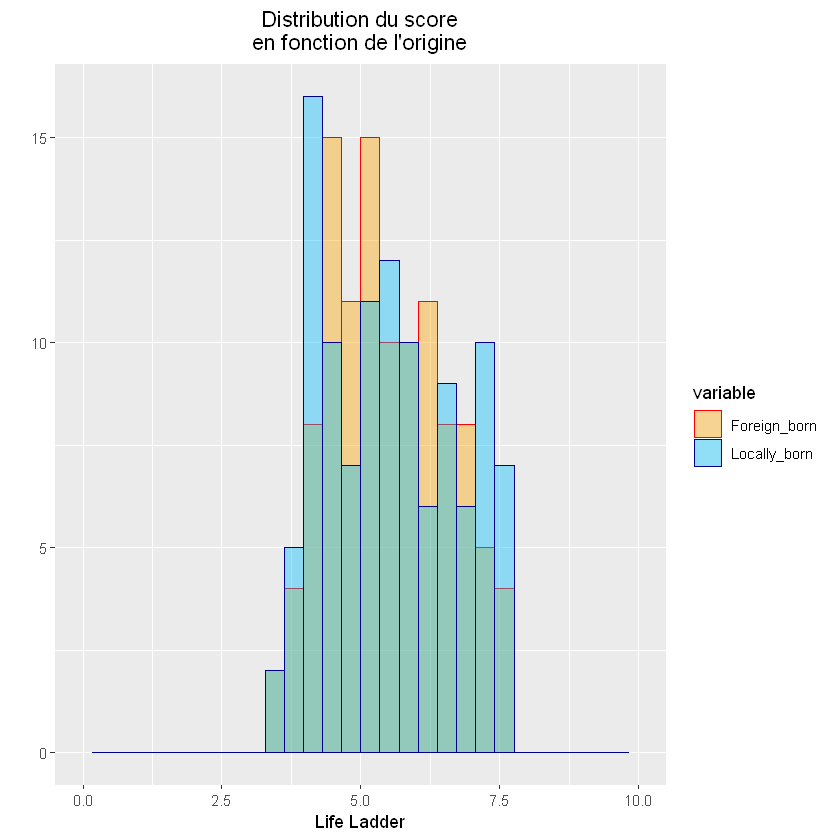

In [5]:
ggplot(melt(data[,c(3,6)]), aes(x = value)) +
    geom_histogram(aes(color = variable, fill = variable),
                   position = "identity",
                   bins = 30, alpha = 0.4) +
    scale_color_manual(values = c("red", "blue4")) +
    scale_fill_manual(values = c("orange", "deepskyblue")) +
    scale_x_continuous(name = "Life Ladder",
                       limits = c(0, 10)) + ylab("") +
    theme(plot.title = element_text(hjust = 0.5)) +
    labs(title = "Distribution du score\nen fonction de l'origine")

## Matrice de corrélation des variables
Visualisons la **matrice de corrélation** entre les variables.

La distribution de chacun des variables figure sur la diagonale. Les nuages de points avec les courbes de tendance, sous la diagonale. Les coefficients de corrélation de Pearson avec les niveaux de significativité, sur la partie supérieure.  
Signif. codes:  0 '\*\*\*' 0.001 '\*\*' 0.01 '\*' 0.05 '.' 0.1 ' ' 1

- Les 8 premières variables endogènes sont significativement corrélées avec `Life_Ladder`.
- `Confidence_government` n'est pas corrélée avec la variable à expliquer, toutefois elle est significativement corrélée avec `Freedom` et `Corruption`.
- Le nuage de points de `Democratic_quality` et `Delivery_quality` démontre un accroissement simultané des deux paramètres et donc d'une forte corrélation positive entre elles. De plus, elles sont significativement corrélées avec la variables à expliquer et les 8 premières variables endogènes.
- Les deux variables de `GINI` possèdent sensiblement la même distribution et sont significativement corrélées. `GINI_household` est la plus corrélée à la variable à expliquer.
- Les trois variables de `Trust_People` sont distribuées de la même manière et sont fortement corrélées entre elles. `Trust_People_WVS_05_09` est la plus corrélée à `Life_Ladder`.

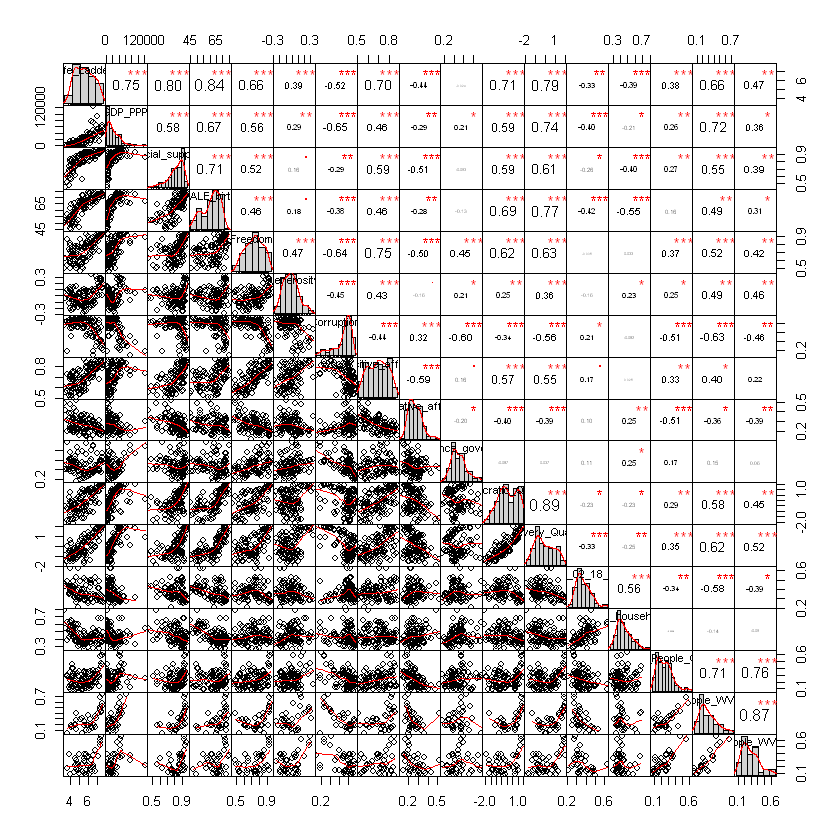

In [6]:
chart.Correlation(data[,7:length(data)],
                  histogram = T)

## Répartition des variables de sondage
Visualisons la répartition des variables explicatives obtenues par sondage.  
Les interprétations de la matrice de corrélation s'appliquent à cette représentation.  
Les variables `Democratic_Quality` et `Delivery_Quality` sont sensiblement réparties de la même manière.  
Lors de l'optimisation de nos modèles, nous choisirons parmis les variables semblablement réparties (`GINI` et `Trust`), celles qui sont les plus corrélées à `Life_Ladder`.

Using  as id variables
Warning message:
"Removed 177 rows containing non-finite values (stat_boxplot)."

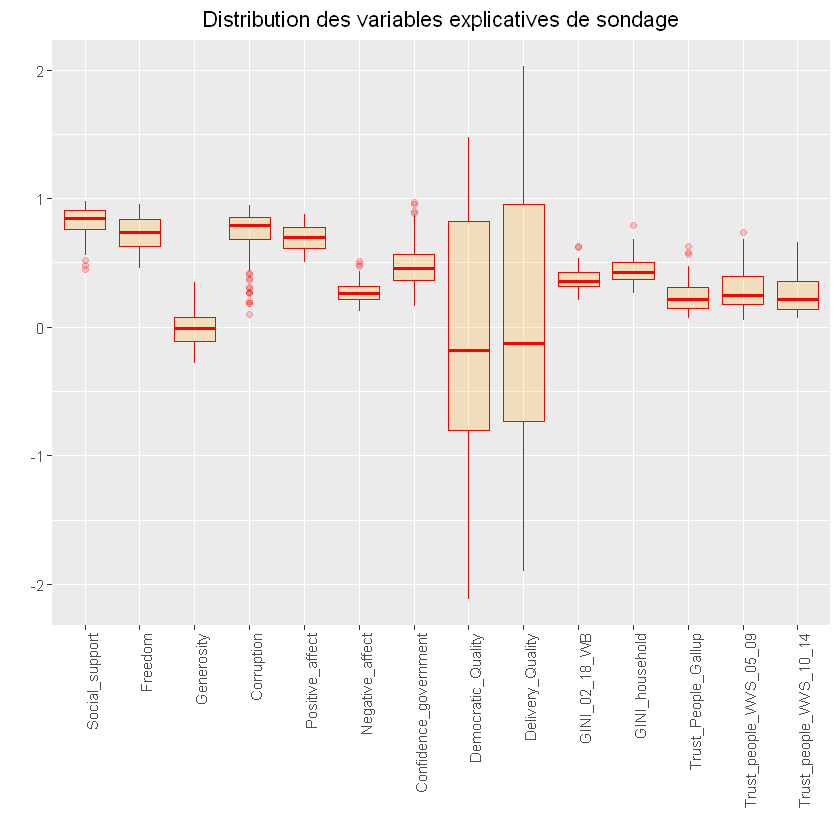

In [7]:
ggplot(melt(data[, c(9, 11:length(data))]),
       aes(x = variable, y = value)) +
    geom_boxplot(color = "red", fill = "orange", alpha = 0.2) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1),
          plot.title = element_text(hjust = 0.5)) +
    labs(title = "Distribution des variables explicatives de sondage",
         x = "", y = "")

## Nuage de points et tendance
Dans la matrice de corrélation précédente, on remarque une tendance exponentielle entre `Life_Ladder`~`GDP_PPP`.  
L'utilisation du logarithme naturel de `GDP_PPP` correspond beaucoup mieux aux données de `Life_Ladder`.

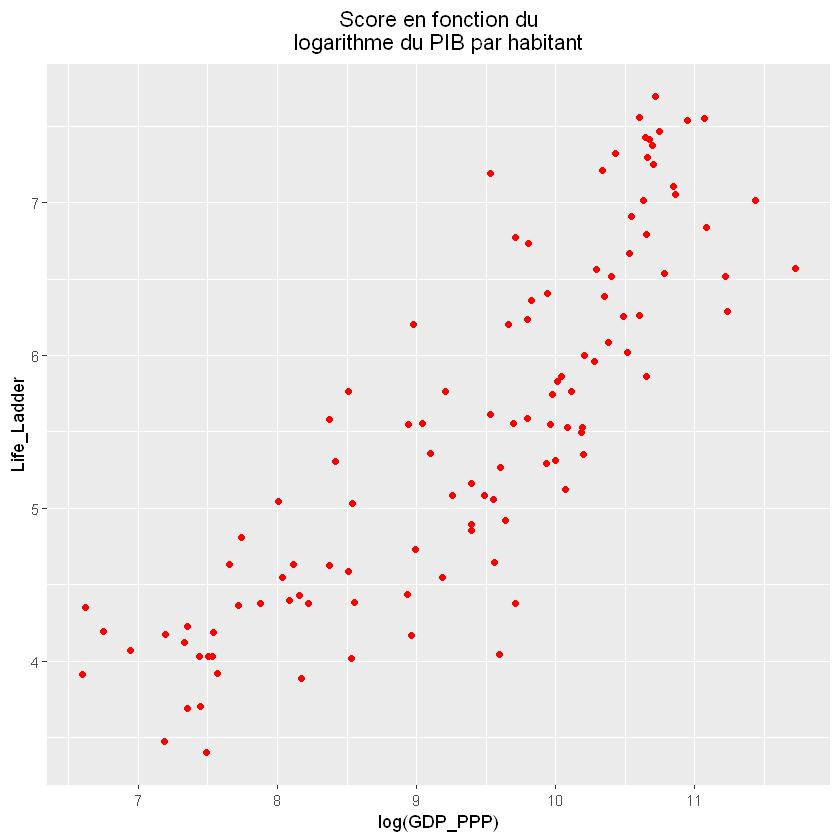

In [8]:
ggplot(data) +
    aes(x = log(GDP_PPP), y = Life_Ladder) +
    geom_point(color = "red") +
    theme(plot.title = element_text(hjust = 0.5)) +
    labs(title = "Score en fonction du\nlogarithme du PIB par habitant")

# Modélisation
## Modèle 1: modèle linéaire général
Nous effectuons une régression sur un modèle linéaire sur toutes nos variables explicatives de façon brute.
$$\textrm{Life_Ladder} \sim \textrm{GDP_PPP} + \textrm{Social_support} + \textrm{HALE_birth} + ... + \textrm{Trust_people_WVS_10_14}$$

In [9]:
mod1 <- lm(Life_Ladder~., data = data[,7:length(data)])
summary(mod1)


Call:
lm(formula = Life_Ladder ~ ., data = data[, 7:length(data)])

Residuals:
        2        18        23        28        34        39        40        45 
-0.188608 -0.200623  0.069253 -0.188465 -0.007165  0.172108 -0.126427 -0.199601 
       46        60        64        68        80        81        88        91 
 0.216484 -0.265199  0.387700  0.199285 -0.022866 -0.135281 -0.034387 -0.046382 
       93        99       102       105       106 
-0.139434  0.217300  0.036706  0.129352  0.126252 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)             1.704e+00  1.631e+01   0.104    0.922
GDP_PPP                 3.109e-05  2.752e-05   1.130    0.322
Social_support          2.670e+00  4.073e+00   0.655    0.548
HALE_birth             -4.580e-02  2.947e-01  -0.155    0.884
Freedom                 2.294e+00  2.890e+00   0.794    0.472
Generosity              1.592e+00  4.885e+00   0.326    0.761
Corruption             -1.914e-03  2.633e+00 

Ce modèle est globalement valide mais aucun coefficient n'est significatif comme attendu.  
Il faut noter que les variables `Trust` possèdent un nombre important de valeurs manquantes. Nous ne les garderons pas.  
En s'appuyant sur l'analyse descriptive précédente, entre `GINI 2000-16` et `GINI household` fortement corrélées nous garderon la dernière car mieux corrélée à la variable à expliquer.

## Modèle 2: modèle sur les qualités et GINI
L'analyse descriptive a conclut que `Democratic_quality` et `Delivery_quality` sont corrélées entre elles et significativement corrélées aux 8 premières variables endogènes.  
On pose comme nouveau modèle `Life_Ladder` expliquée par ces deux variables et l'indice de `GINI` gardée.
$$\textrm{Life_Ladder} \sim \textrm{Democratic_Quality} + \textrm{Delivery_Quality} + \textrm{GINI_household}$$

In [10]:
mod2 <- lm(Life_Ladder ~ Democratic_Quality + Delivery_Quality + GINI_household,
           data = data)
summary(mod2)


Call:
lm(formula = Life_Ladder ~ Democratic_Quality + Delivery_Quality + 
    GINI_household, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.51520 -0.45458 -0.03486  0.38366  1.67498 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.51231    0.30378  21.438  < 2e-16 ***
Democratic_Quality  0.02632    0.14801   0.178 0.859210    
Delivery_Quality    0.76592    0.13401   5.716 1.01e-07 ***
GINI_household     -2.37819    0.66669  -3.567 0.000543 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6814 on 106 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.6602,	Adjusted R-squared:  0.6506 
F-statistic: 68.66 on 3 and 106 DF,  p-value: < 2.2e-16


Ce 2e modèle est globalement valide et toutes les varibles sont significatives à l'exception de `Democratic_Quality`, avec un R2 ajusté de 0.65.  
En effet, la part de variance expliquée part ce modèle est assez faible.

## Modèle 3: modèle sur les 8 variables et GINI
Ajustons sur les 8 premières variables exogènes et `GINI`.  
En se basant sur l'analyse descriptive, nous utiliserons le logarithme naturel du PIB par habitant.  
`Freedom` et `Corruption` seront utilisées au lieu de `Confidence_government`.
$$\textrm{Life_Ladder} \sim log(\textrm{GDP_PPP}) + \textrm{Social_support} + \textrm{HALE_birth} + \textrm{Freedom} + \\ \textrm{Generosity} + \textrm{Corruption} + \textrm{Positive_affect} + \textrm{Negative_affect} + \textrm{GINI_household}$$

In [11]:
mod3 <- lm(Life_Ladder ~ log(GDP_PPP) + Social_support + HALE_birth + Freedom + Generosity + Corruption + 
    Positive_affect + Negative_affect + GINI_household,
           data = data)
summary(mod3)


Call:
lm(formula = Life_Ladder ~ log(GDP_PPP) + Social_support + HALE_birth + 
    Freedom + Generosity + Corruption + Positive_affect + Negative_affect + 
    GINI_household, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.81625 -0.23087 -0.01223  0.16992  0.86038 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.63513    0.69590  -2.350  0.02078 *  
log(GDP_PPP)     0.31308    0.06278   4.987 2.62e-06 ***
Social_support   1.86162    0.55250   3.369  0.00107 ** 
HALE_birth       0.01883    0.01048   1.798  0.07528 .  
Freedom          0.29779    0.49392   0.603  0.54794    
Generosity       1.51695    0.32338   4.691 8.72e-06 ***
Corruption      -0.38233    0.26119  -1.464  0.14643    
Positive_affect  3.16023    0.65295   4.840 4.79e-06 ***
Negative_affect  0.75540    0.69062   1.094  0.27670    
GINI_household  -1.84804    0.54524  -3.389  0.00101 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' '

Ce 3e modèle est globalement significatif avec un R2 ajusté de 0.90. La part de variance expliquée est nettement plus élevée par rapport au modèle précédent.  
`Freedom` et `Corruption` ne sont pas significatives au niveau $\alpha$ = 10%. La corruption dans les institutions et la liberté de choix de vie n'influent que très peu sur le bonheur subjectif.  
Le `Negative_affect` n'est pas significative non plus, l'impact de la tristesse, de l'inquiétude et de la colère est éphémère sur le bonheur subjectif.

## Modèle 4: optimisation sur les variables significatives
Nous retirons les variables qui ne sont pas significatives au niveau $\alpha$ = 10% dans le 3e modèle.
$$\textrm{Life_Ladder} \sim log(\textrm{GDP_PPP}) + \textrm{Social_support} +\\ \textrm{HALE_birth} + \textrm{Generosity} + \textrm{Positive_affect} + \textrm{GINI_household}$$

In [11]:
mod4 <- lm(Life_Ladder ~ log(GDP_PPP) + Social_support + HALE_birth + Generosity +
           Positive_affect + GINI_household,
           data = data)
summary(mod4)


Call:
lm(formula = Life_Ladder ~ log(GDP_PPP) + Social_support + HALE_birth + 
    Generosity + Positive_affect + GINI_household, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85611 -0.21520 -0.02335  0.19472  0.87035 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2.09406    0.52204  -4.011 0.000115 ***
log(GDP_PPP)     0.35396    0.05887   6.013 2.80e-08 ***
Social_support   1.53701    0.51112   3.007 0.003314 ** 
HALE_birth       0.02320    0.01001   2.317 0.022455 *  
Generosity       1.71237    0.30226   5.665 1.34e-07 ***
Positive_affect  3.16953    0.49937   6.347 5.98e-09 ***
GINI_household  -1.38740    0.47709  -2.908 0.004455 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3619 on 103 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9069,	Adjusted R-squared:  0.9014 
F-statistic: 167.2 on 6 and 103 DF,  p-value: < 2.2e

Notre modèle optimisé est donc naturellement valide. Toutes les variables sont significatives au niveau $\alpha$ = 5%.  
La déletion des 3 variables non significatives n'a pas baissé le R2, qui est toujours de 0.90

## Modèle 5: endogénéité de GDP
Cette forte valeur de R2 peut cacher un problème d'endogénéité.  
En effet, la qualité du gouvernement et la corruption minent souvent une économie et touche directement le PIB par habitant qui, quand il est faible, explique un score élevé dans les effets négatifs.  
Nous prendrons donc `Delivery_Quality`, `Corruption` et `Negative_affect` comme instruments.

In [35]:
iv <- ivreg(Life_Ladder ~ log(GDP_PPP) + Social_support + HALE_birth + Generosity + 
    Positive_affect + GINI_household | . - log(GDP_PPP) + Delivery_Quality + Corruption + 
    Negative_affect, data = data)
summary(iv, diagnostics = T)


Call:
ivreg(formula = Life_Ladder ~ log(GDP_PPP) + Social_support + 
    HALE_birth + Generosity + Positive_affect + GINI_household | 
    . - log(GDP_PPP) + Delivery_Quality + Corruption + Negative_affect, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.01744 -0.26060  0.01013  0.22536  1.03385 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.8371897  0.5758905  -3.190  0.00189 ** 
log(GDP_PPP)     0.5473695  0.1290774   4.241 4.91e-05 ***
Social_support   1.0189028  0.6354193   1.604  0.11191    
HALE_birth      -0.0003612  0.0171068  -0.021  0.98319    
Generosity       1.9051202  0.3371630   5.650 1.46e-07 ***
Positive_affect  3.1250902  0.5279431   5.919 4.37e-08 ***
GINI_household  -1.6548179  0.5309740  -3.117  0.00238 ** 

Diagnostic tests:
                 df1 df2 statistic  p-value    
Weak instruments   3 100    10.057 7.51e-06 ***
Wu-Hausman         1 101     3.241   0.0748 .  
Sargan             2

- `Weak instruments`: on rejette $H_0$: "*les instruments sont tous nuls*", il existe au moins un instrument fort
- `Wu-Hausman`: on rejette au niveau $\alpha$=10% $H_0$ qui suppose que `log(GDP_PPP)` n'est pas corrélée avec le terme d'erreur, ce qui indique qu'elle est marginalement endogène.
- `Sargan`: on ne rejette pas l'hypothèse nulle, ce qui signifie que les instruments supplémentaires sont valides (ne sont pas corrélés avec le terme d'erreur).

Dans ce modèle, le PIB par habitant est marginalement endogène. En effet, la variable est dépend des instruments qui étaient capturés par $\varepsilon$. `Social_support` et `HALE_birth` ne sont plus significatives, et le R2 n'a que peu diminué.  
Comme à $\alpha$ 0.05 il n'y a pas de problème d'endogénéité, on garde alors l'estimation des MCO du modèle 4 qui est meilleure.